In [ ]:
!pip install opencv_python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
yolo = cv2.dnn.readNet("/content/drive/MyDrive/Zomato Stock datasets/yolov3.weights" , "/content/drive/MyDrive/Zomato Stock datasets/yolov3.cfg")

In [ ]:
classes = []

with open("/content/drive/MyDrive/Zomato Stock datasets/coco.names" , "r") as f:
  classes = f.read().splitlines()

In [ ]:
len(classes)
classes

In [ ]:
image = cv2.imread("/content/images (6).jpg")
height, width, channels = image.shape
# Convert into RGB Format

In [ ]:
blob = cv2.dnn.blobFromImage(image , 1/255 ,(350,350),(0,0,0) ,swapRB = True , crop = False)

In [ ]:
blob.shape

(1, 3, 350, 350)

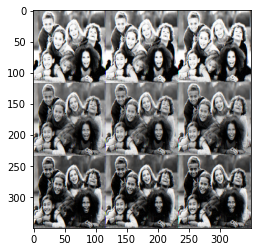

In [ ]:
"""
to print image
"""

i = blob[0].reshape(350,350,3)

plt.imshow(i)

In [ ]:
yolo.setInput(blob)

In [ ]:
# determine only the *output* layer names that we need from YOLO
ln =yolo.getLayerNames()

In [ ]:
output_layers = [ln[i - 1] for i in yolo.getUnconnectedOutLayers()]
layer_output = yolo.forward(output_layers)

In [ ]:
len(layer_output)

3

In [ ]:
boxes = []
confidences =[]
class_ids =[]

for output in layer_output:
  for detection in output:
    score = detection[5:]
    class_id = np.argmax(score)
    confidence = score[class_id]
    if confidence > 0.1:
      center_x = int(detection[0] * width)
      center_y = int(detection[1] * height)
      w = int(detection[2] * width)
      h = int(detection[3] * height)

      x = int(center_x - w/2)
      y = int(center_y - h/2)

      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)

In [ ]:
len(boxes)

34

In [ ]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [ ]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255,size=(len(boxes),2))

In [ ]:
for i in indexes.flatten():
  x,y,w,h = boxes[i]

  lable = str(classes[class_ids[i]])
  confi =str(round(confidences[i],2))
  color = colors[i]

  cv2.rectangle(image , (x,y),(x+w ,y+h) ,color ,1)
  cv2.putText(image , lable +" "+ confi, (x,y+20),  font , 2 , (255,255,255), 1)



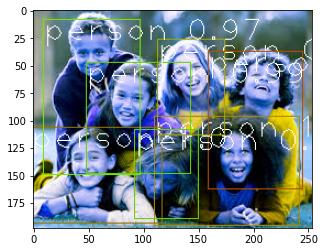

In [ ]:
plt.imshow(image)